<a href="https://colab.research.google.com/github/dikshantshambharkar/TCS_stock_analytics/blob/main/FinalProjectBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Contents**
1.


Importing important libraries

In [4]:
# import libraries
import pandas as pd
import plotly.express as px

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

try:
    import mplfinance as mpf
    import mpl_finance as mplf
    from mpl_finance import candlestick_ohlc
except:
    !pip install mplfinance mpl_finance
    import mplfinance as mpf
    import mpl_finance as mplf
    from mpl_finance import candlestick_ohlc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 3.0 MB/s eta 0:00:00


Importing Dataset

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
tcs = pd.read_csv('/content/drive/MyDrive/TCS_Latest_stockdata_yahoo.csv')
print(tcs.head())

         Date       Open       High        Low      Close  Adj Close    Volume
0  2002-08-12  38.724998  40.000000  38.724998  39.700001  28.484993  212976.0
1  2002-08-13  39.750000  40.387501  38.875000  39.162498  28.099329  153576.0
2  2002-08-14  39.250000  39.250000  35.724998  36.462502  26.162064  822776.0
3  2002-08-15  36.462502  36.462502  36.462502  36.462502  26.162064       0.0
4  2002-08-16  36.275002  38.000000  35.750000  36.375000  26.099281  811856.0


In [7]:
tcs.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5138,2023-04-05,3185.500000,3264.350098,3185.500000,3239.800049,3239.800049,2655065.0
5139,2023-04-06,3225.000000,3257.350098,3215.000000,3220.699951,3220.699951,1703464.0
5140,2023-04-10,3220.000000,3272.000000,3215.000000,3263.399902,3263.399902,2203187.0
5141,2023-04-11,3264.000000,3272.949951,3192.149902,3213.800049,3213.800049,2348779.0
5142,2023-04-12,3227.949951,3260.949951,3199.000000,3241.649902,3241.649902,2417727.0


Total number of Rows and column

In [8]:
tcs.shape


(5143, 7)

Missing values

In [9]:
tcs.isnull().sum()

Date         0
Open         9
High         9
Low          9
Close        9
Adj Close    9
Volume       9
dtype: int64

Dropping the missing values

In [10]:
tcs.dropna()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-08-12,38.724998,40.000000,38.724998,39.700001,28.484993,212976.0
1,2002-08-13,39.750000,40.387501,38.875000,39.162498,28.099329,153576.0
2,2002-08-14,39.250000,39.250000,35.724998,36.462502,26.162064,822776.0
3,2002-08-15,36.462502,36.462502,36.462502,36.462502,26.162064,0.0
4,2002-08-16,36.275002,38.000000,35.750000,36.375000,26.099281,811856.0
...,...,...,...,...,...,...,...
5138,2023-04-05,3185.500000,3264.350098,3185.500000,3239.800049,3239.800049,2655065.0
5139,2023-04-06,3225.000000,3257.350098,3215.000000,3220.699951,3220.699951,1703464.0
5140,2023-04-10,3220.000000,3272.000000,3215.000000,3263.399902,3263.399902,2203187.0
5141,2023-04-11,3264.000000,3272.949951,3192.149902,3213.800049,3213.800049,2348779.0


In [11]:
tcs.describe().T.style.bar(
    subset=['mean'],
    color='#606ff2').background_gradient(
    subset=['std'], cmap='PuBu').background_gradient(subset=['50%'], cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
Open,5134.000000,1080.912037,1044.142759,32.474998,228.218750,653.500000,1433.293762,4033.949951
High,5134.000000,1092.363274,1053.444802,36.450001,233.768745,660.037506,1441.106262,4043.000000
Low,5134.000000,1068.526979,1033.776858,32.474998,222.312500,646.024994,1418.125000,3980.000000
Close,5134.000000,1080.325316,1043.544657,35.474998,227.459370,652.012512,1431.412537,4019.149902
Adj Close,5134.000000,976.026785,1020.026184,25.453529,168.513802,526.073150,1284.518067,3885.789307
Volume,5134.000000,3247111.494741,3186767.093843,0.000000,1663095.750000,2554532.000000,4024570.000000,88067154.000000


## Visualization

Line plot

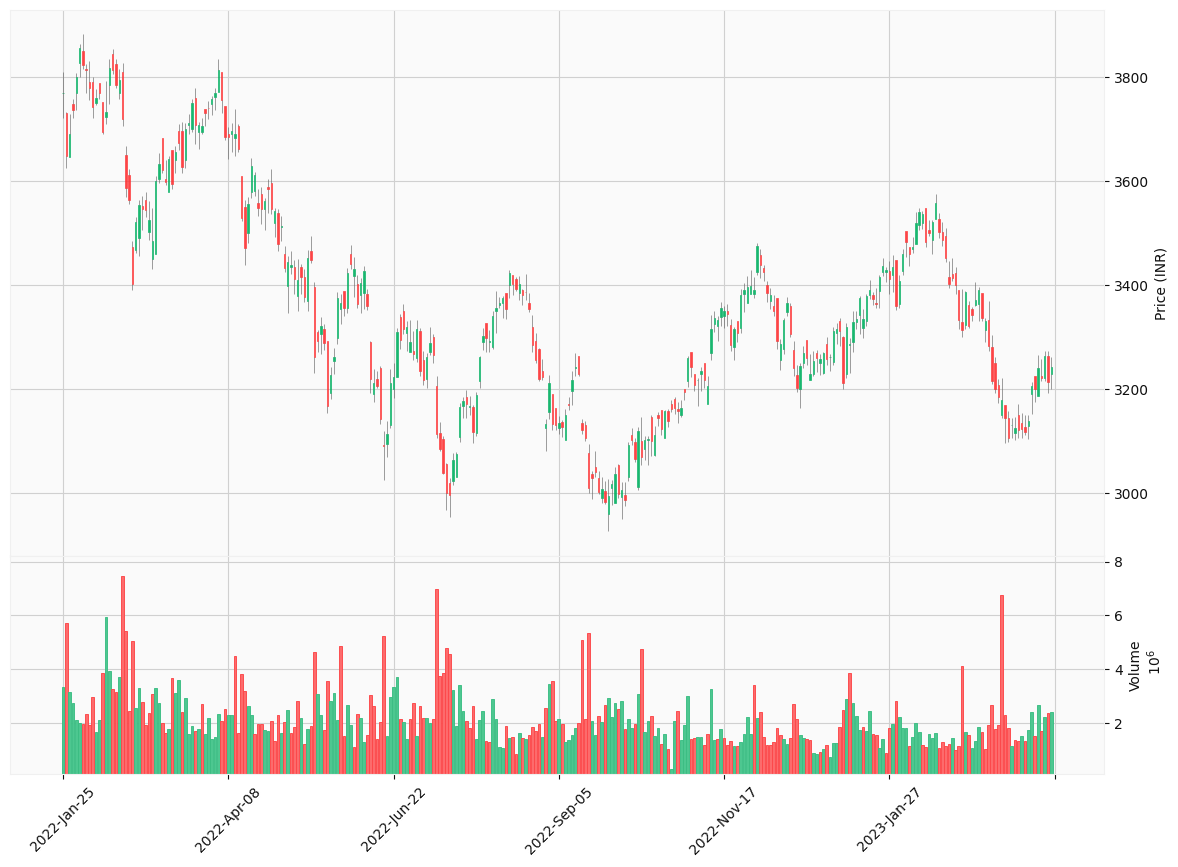

In [54]:
mpf.plot(tcs.tail(300), type='candle', style='yahoo',
        ylabel='Price (INR)',
        ylabel_lower='Volume',
        volume=True,
        figscale=1.9
        )

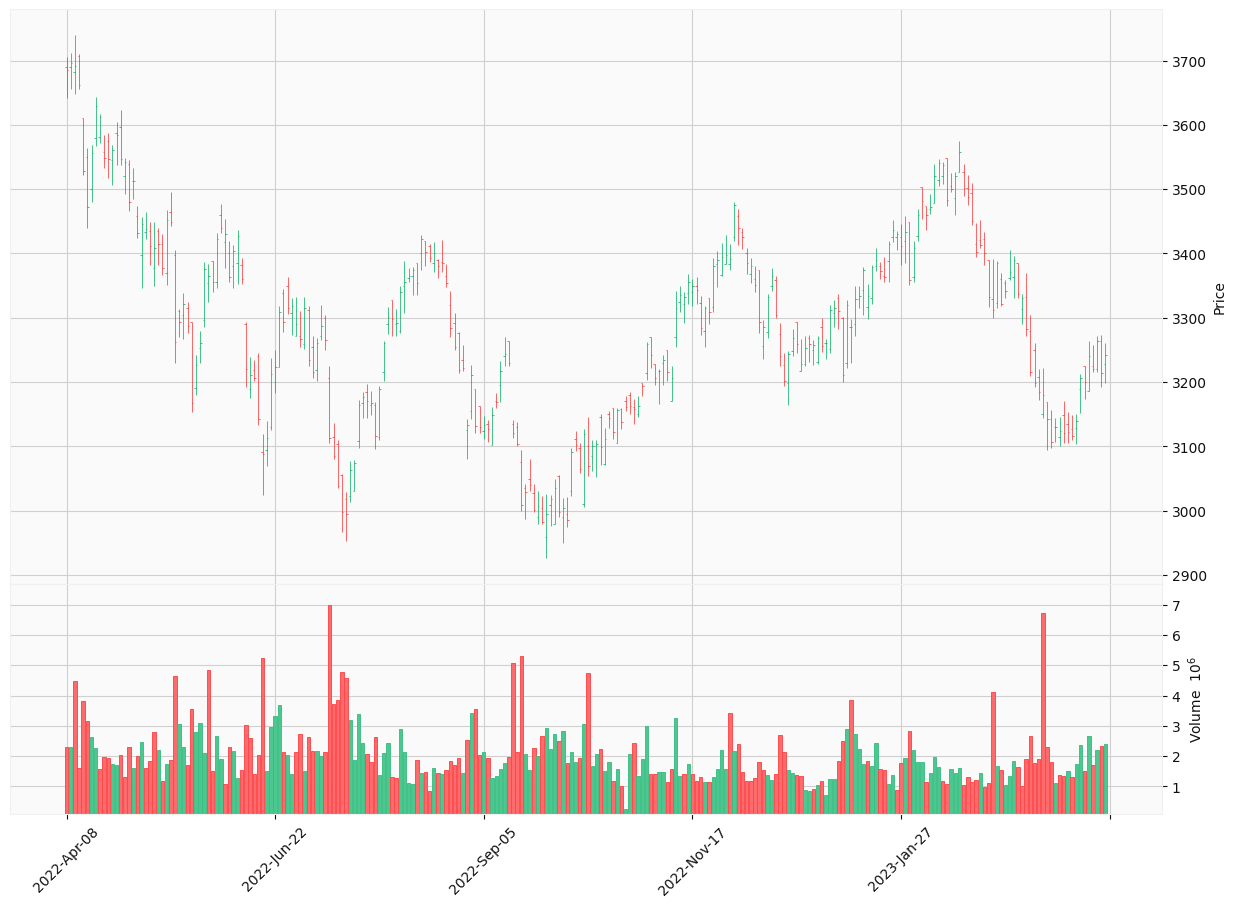

In [52]:
mpf.plot(tcs.tail(250),type='ohlc',
         style='yahoo',
         volume=True,
        figscale=2)

In [12]:
fig = px.line(tcs,x = 'Date', y = ['High', 'Low'], template = 'plotly_dark')
fig.show()

In [13]:
fig = px.line(tcs,x = 'Date', y = ['Open', 'Close'], template = 'plotly_dark')
fig.show()

In [14]:
fig = px.line(tcs,x = 'Date', y = ['Volume'], template = 'plotly_dark')
fig.show()

# ***CAGR Compound Annual Growth Rate (CAGR)***

In [15]:
tcs2 = pd.read_csv('/content/drive/MyDrive/TCS_Latest_stockdata_yahoo.csv', header=0, 
                  index_col= 0, names=['Date','Open', 'High', 'Low', 'Close','Adj Close', 'Volume'], parse_dates=True)
# Get the number of days in `tcs`
days = (tcs2.index[-1] - tcs2.index[0]).days

# Calculate the CAGR 
cagr = ((((tcs2['Close'][-1]) / tcs2['Close'][1])) ** (365.0/days)) - 1


# Print CAGR
print("The CAGR (Compound Annual Growth Rate) of TCS since IPO is " , round((cagr*100),2), "% per year")

The CAGR (Compound Annual Growth Rate) of TCS since IPO is  23.81 % per year


Text(0.5, 1.0, 'Total money made by TCS Stock (number of times ): 505.8')

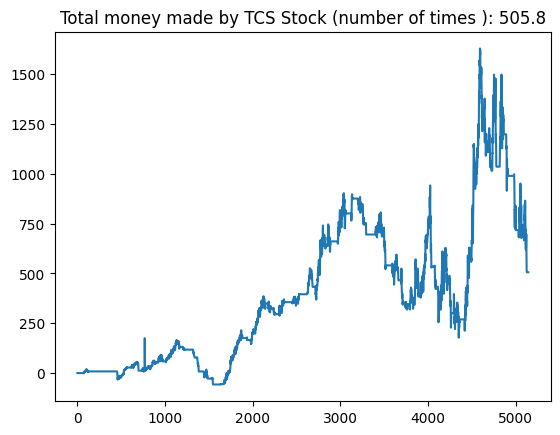

In [16]:
tcs['SMA20'] = tcs.Close.rolling(20).mean()
tcs['SMA50'] = tcs.Close.rolling(50).mean()
tcs['Shares'] = [1 if tcs.loc[ei, 'SMA20']>tcs.loc[ei, 'SMA50'] else 0 for ei in tcs.index]
tcs['Close1'] = tcs['Close'].shift(-1)
tcs['Profit'] = [tcs.loc[ei, 'Close1'] - tcs.loc[ei, 'Close'] if tcs.loc[ei, 'Shares']==1 else 0 for ei in tcs.index]
tcs['wealth'] = tcs['Profit'].cumsum()
tcs['wealth'].plot()
plt.title('Total money made by TCS Stock (number of times ): {}'.format(round((tcs.loc[tcs.index[-2], 'wealth']),1)))

/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:83: UserWarning:




            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.




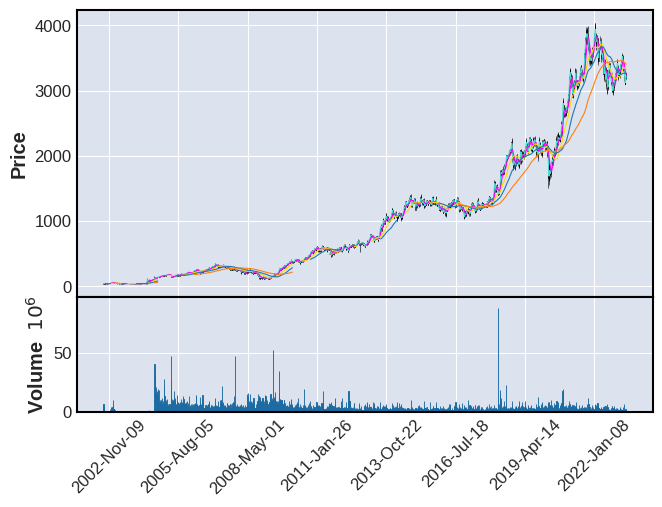

In [17]:
tcs.index = pd.DatetimeIndex(tcs['Date'])
mpf.plot(tcs, type='candle', mav = (7, 30, 90, 180, 365), volume = True , show_nontrading = True)

### ***Using ML models to Forecast the prices***

Read the Data

In [18]:
df = pd.read_csv('/content/drive/MyDrive/TCS_Latest_stockdata_yahoo.csv')
df.dropna()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-08-12,38.724998,40.000000,38.724998,39.700001,28.484993,212976.0
1,2002-08-13,39.750000,40.387501,38.875000,39.162498,28.099329,153576.0
2,2002-08-14,39.250000,39.250000,35.724998,36.462502,26.162064,822776.0
3,2002-08-15,36.462502,36.462502,36.462502,36.462502,26.162064,0.0
4,2002-08-16,36.275002,38.000000,35.750000,36.375000,26.099281,811856.0
...,...,...,...,...,...,...,...
5138,2023-04-05,3185.500000,3264.350098,3185.500000,3239.800049,3239.800049,2655065.0
5139,2023-04-06,3225.000000,3257.350098,3215.000000,3220.699951,3220.699951,1703464.0
5140,2023-04-10,3220.000000,3272.000000,3215.000000,3263.399902,3263.399902,2203187.0
5141,2023-04-11,3264.000000,3272.949951,3192.149902,3213.800049,3213.800049,2348779.0


Convert the Date column to a numeric format

In [19]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].astype(int) / 10**9

split into features and target

In [20]:
X = df.drop(['Date', 'Close'], axis=1)  # features
y = df['Close']  # target

split into train and test sets

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

drop rows with missing values

In [22]:
X_train = X_train.dropna()
y_train = y_train[X_train.index]

X_test = X_test.dropna()
y_test = y_test[X_test.index]

Create and train the DecisionTree Model

In [23]:
dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train)

DecisionTreeRegressor()

Create and train the RandomForestRegressor Model

In [24]:
model_rfm = RandomForestRegressor(n_estimators=100, random_state=42)
model_rfm.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Create and train the SVM Model

In [25]:
model_svm = SVR(kernel='rbf', C=1e3, gamma=0.1)
model_svm.fit(X_train, y_train)

SVR(C=1000.0, gamma=0.1)

 Make predictions on the test data

In [26]:
y_pred_d = dtree.predict(X_test)
y_pred_rfm = model_rfm.predict(X_test)
y_pred_svm = model_svm.predict(X_test)

evaluate the model using mean squared error and R-squared score

In [27]:
mse_d = mean_squared_error(y_test, y_pred_d)
r2_d = r2_score(y_test, y_pred_d)

mse_rfm = mean_squared_error(y_test, y_pred_rfm)
r2_rfm = r2_score(y_test, y_pred_rfm)

mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

Print the mean squared error and R2 score of the model

In [28]:
print("Mean Squared Error of DecisionrTree:", mse_d)
print('Mean squared error of RandomForestRegressor:', mse_rfm)
print("Mean Squared Error of SVM:", mse_svm)
print("R2 Score of DecisionTree:", r2_d)
print('R2 score of RandomForestRegressor:', r2_rfm)
print("R-squared Score of SVM:", r2_svm)

Mean Squared Error of DecisionrTree: 116.41415871017624
Mean squared error of RandomForestRegressor: 68.38212441843415
Mean Squared Error of SVM: 1065706.0194715962
R2 Score of DecisionTree: 0.9998947892561413
R2 score of RandomForestRegressor: 0.9999381988045405
R-squared Score of SVM: 0.03685492997050832


### **TCS Stock Price Prediction**

Importing the dataset

In [29]:
df = pd.read_csv('/content/drive/MyDrive/TCS_Latest_stockdata_yahoo.csv')

filter the 'Date' and 'Close' columns

In [30]:
df = df[['Date', 'Close']]

convert the 'Date' column to datetime

In [31]:
df['Date'] = pd.to_datetime(df['Date'], utc=True)

Prepare the data

In [32]:
df = df[['Date', 'Close']]
df = df.dropna()
X = np.array(df.index).reshape(-1, 1)
y = np.array(df['Close'])

Train the model

Decision Tree Regressor

In [33]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X, y)

DecisionTreeRegressor()

Random Forest Regressor

In [34]:
rf_reg = RandomForestRegressor(n_estimators=100)
rf_reg.fit(X, y)

RandomForestRegressor()

Support Vector Regressor

In [35]:
svr_reg = SVR(kernel='rbf')
svr_reg.fit(X, y)

SVR()

Forecast the prices for the next month

In [36]:
X_forecast = np.array(np.arange(len(df)+1, len(df)+32)).reshape(-1, 1)
y_dt = dt_reg.predict(X_forecast)
y_rf = rf_reg.predict(X_forecast)
y_svr = svr_reg.predict(X_forecast)

Plot the predictions on a chart

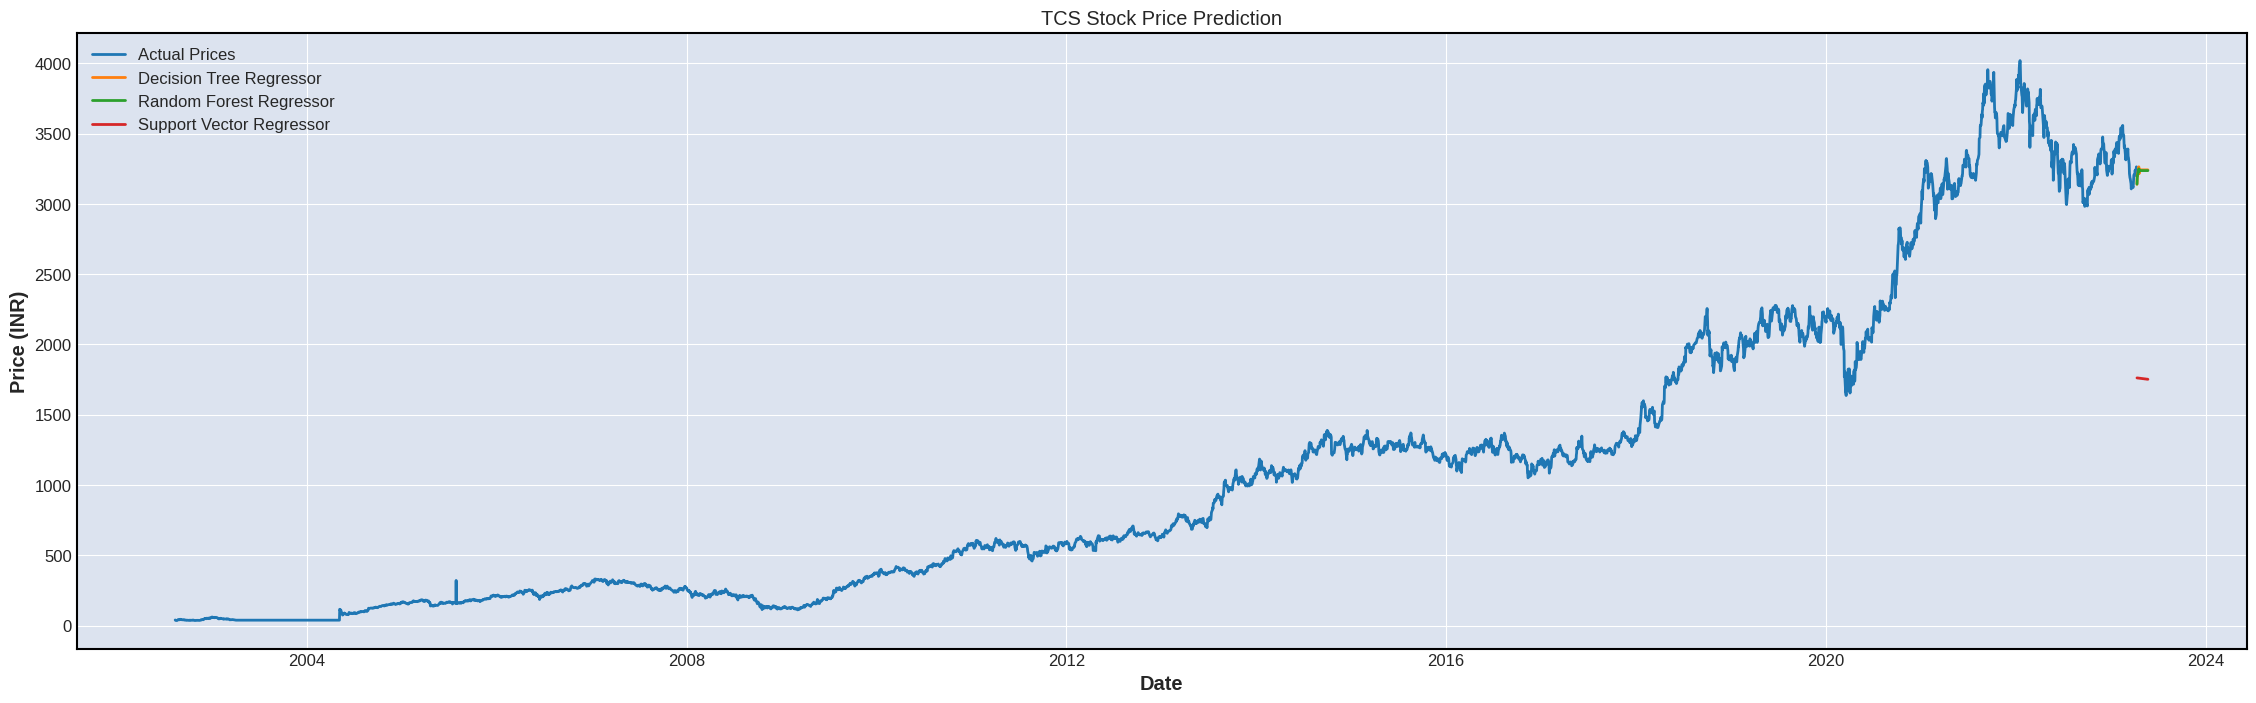

In [37]:
plt.figure(figsize=(28,8))
plt.plot(df['Date'], df['Close'], label='Actual Prices')
plt.plot(pd.date_range(start=df['Date'].iloc[-1], periods=31, freq='B'), y_dt, label='Decision Tree Regressor')
plt.plot(pd.date_range(start=df['Date'].iloc[-1], periods=31, freq='B'), y_rf, label='Random Forest Regressor')
plt.plot(pd.date_range(start=df['Date'].iloc[-1], periods=31, freq='B'), y_svr, label='Support Vector Regressor')
plt.title('TCS Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.show()